# Exploratory Data Analysis - Tweet Sentiment

This jupyter notebook is for exploratory data analysis.

You can have a very detailed view about the dataset.

Looking into the details of the dataset will help you to build a better model 
and understand how to find-tuned the model to increase the performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import *
from torchtext import data
import torch
from torchtext import datasets
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# read train and test csv file
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

## Overview of the Dataset

In [3]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [5]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (27481, 4)
Test Shape: (3534, 3)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [8]:
# There is only one row of null data in the training set.
# Since the text is null so there is nothing we can do to recreate it.
# Let's drop it.
 
train = train.dropna()

In [9]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,45e3b1b07e,The sun is shining brightly and the day has ju...,good,neutral
freq,1,1,199,11117


In [10]:
test.describe()

,textID,text,sentiment
count,3534,3534,3534
unique,3534,3534,3
top,c8384a0df6,My anticipated meet up with Tapan Parikh is no...,neutral
freq,1,1,1430


There is no repetition in the dataset. 

All texts are unique with an unique textID. 

We don't need the textID for traing, but it will be saved for evaluation process.




## Distribution of Sentiment

There are three sentiment: positve, negtive and neutral.

From the histogram we can see the order: neutral > positive > negative

The distribution is acceptable at this point.



In [11]:
train["sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

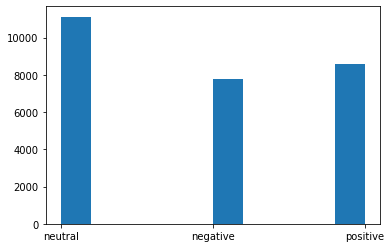

In [12]:
plt.hist(train["sentiment"])
plt.show()

## N-grams

In [13]:
def ngrams_plot(corpus,ngram_range,n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english',ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df

Text(0.5, 0.98, 'Top 10 Selected Text - Unigram')

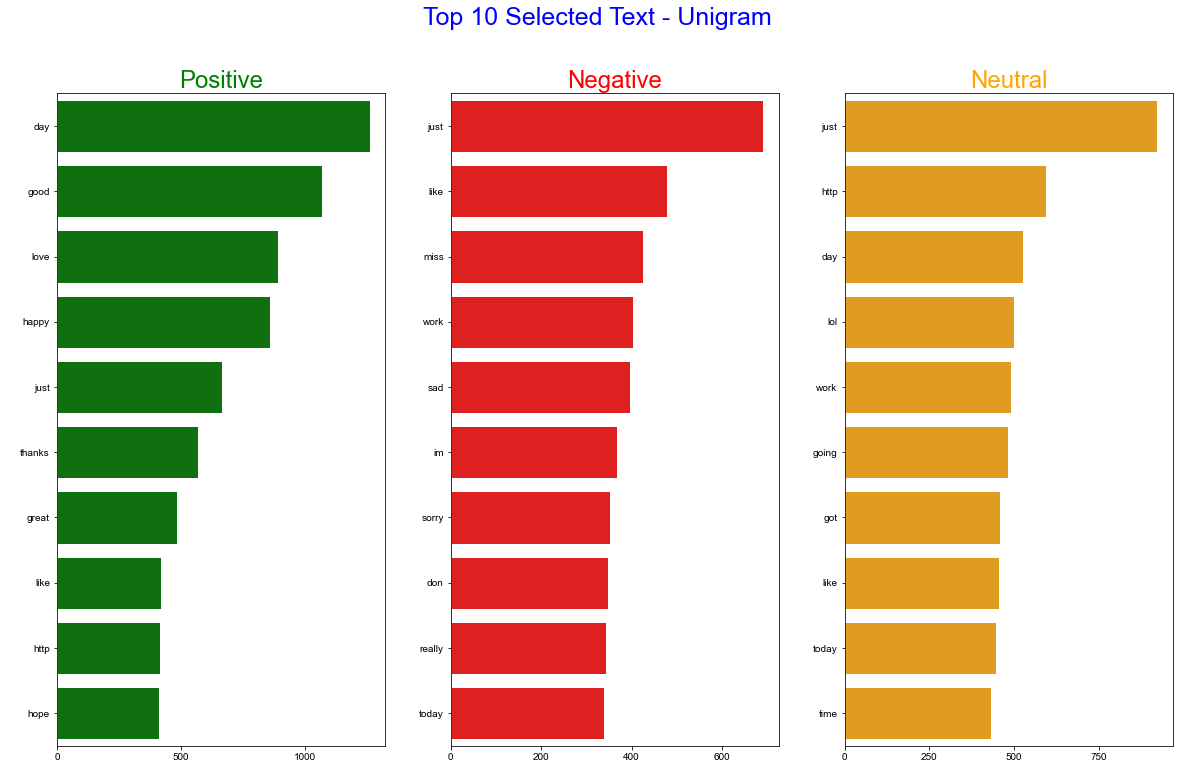

In [14]:
f, axes = plt.subplots(1,3,figsize=(20,12))
sns.set(font_scale =2)
sns.barplot(y=ngrams_plot(train.loc[train['sentiment']=='positive']['text'],(1,1),10)['text'],
            x= ngrams_plot(train.loc[train['sentiment']=='positive']['text'],(1,1),10)['count'],
            color="green",ax=axes[0]).set_title("Positive",color="green")
axes[0].set(ylabel=" ",xlabel=" ")
sns.barplot(y=ngrams_plot(train.loc[train['sentiment']=='negative']['text'],(1,1),10)['text'],
            x=ngrams_plot(train.loc[train['sentiment']=='negative']['text'],(1,1),10)['count'],
            color="red", ax=axes[1]).set_title("Negative",color="red")
axes[1].set(ylabel=" ",xlabel=" ")
sns.barplot(y=ngrams_plot(train.loc[train['sentiment']=='neutral']['text'],(1,1),10)['text'], 
            x=ngrams_plot(train.loc[train['sentiment']=='neutral']['text'],(1,1),10)['count'],
            color="orange", ax=axes[2]).set_title("Neutral",color="orange")
axes[2].set(ylabel=" ",xlabel=" ")
f.suptitle("Top 10 Selected Text - Unigram" ,fontsize=25,color="blue")



Text(0.5, 0.98, 'Top 10 Selected Text - Bigram')

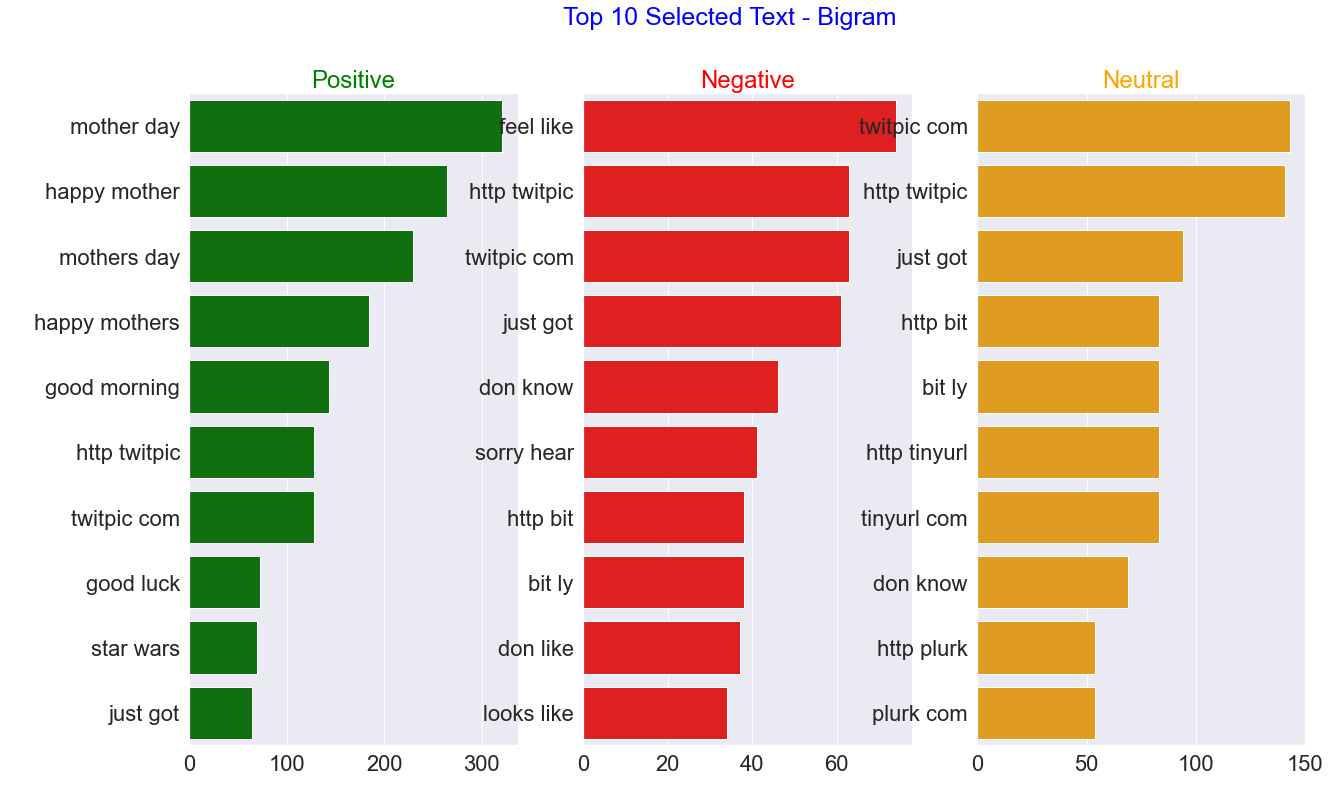

In [15]:
f, axes = plt.subplots(1,3,figsize=(20,12))
sns.set(font_scale =2)
sns.barplot(y=ngrams_plot(train.loc[train['sentiment']=='positive']['text'],(2,2),10)['text'],
            x= ngrams_plot(train.loc[train['sentiment']=='positive']['text'],(2,2),10)['count'],
            color="green",ax=axes[0]).set_title("Positive",color="green")
axes[0].set(ylabel=" ",xlabel=" ")
sns.barplot(y=ngrams_plot(train.loc[train['sentiment']=='negative']['text'],(2,2),10)['text'],
            x=ngrams_plot(train.loc[train['sentiment']=='negative']['text'],(2,2),10)['count'],
            color="red", ax=axes[1]).set_title("Negative",color="red")
axes[1].set(ylabel=" ",xlabel=" ")
sns.barplot(y=ngrams_plot(train.loc[train['sentiment']=='neutral']['text'],(2,2),10)['text'], 
            x=ngrams_plot(train.loc[train['sentiment']=='neutral']['text'],(2,2),10)['count'],
            color="orange", ax=axes[2]).set_title("Neutral",color="orange")
axes[2].set(ylabel=" ",xlabel=" ")
f.suptitle("Top 10 Selected Text - Bigram" ,fontsize=25,color="blue")

Text(0.5, 0.98, 'Top 10 Selected Text - Trigram')

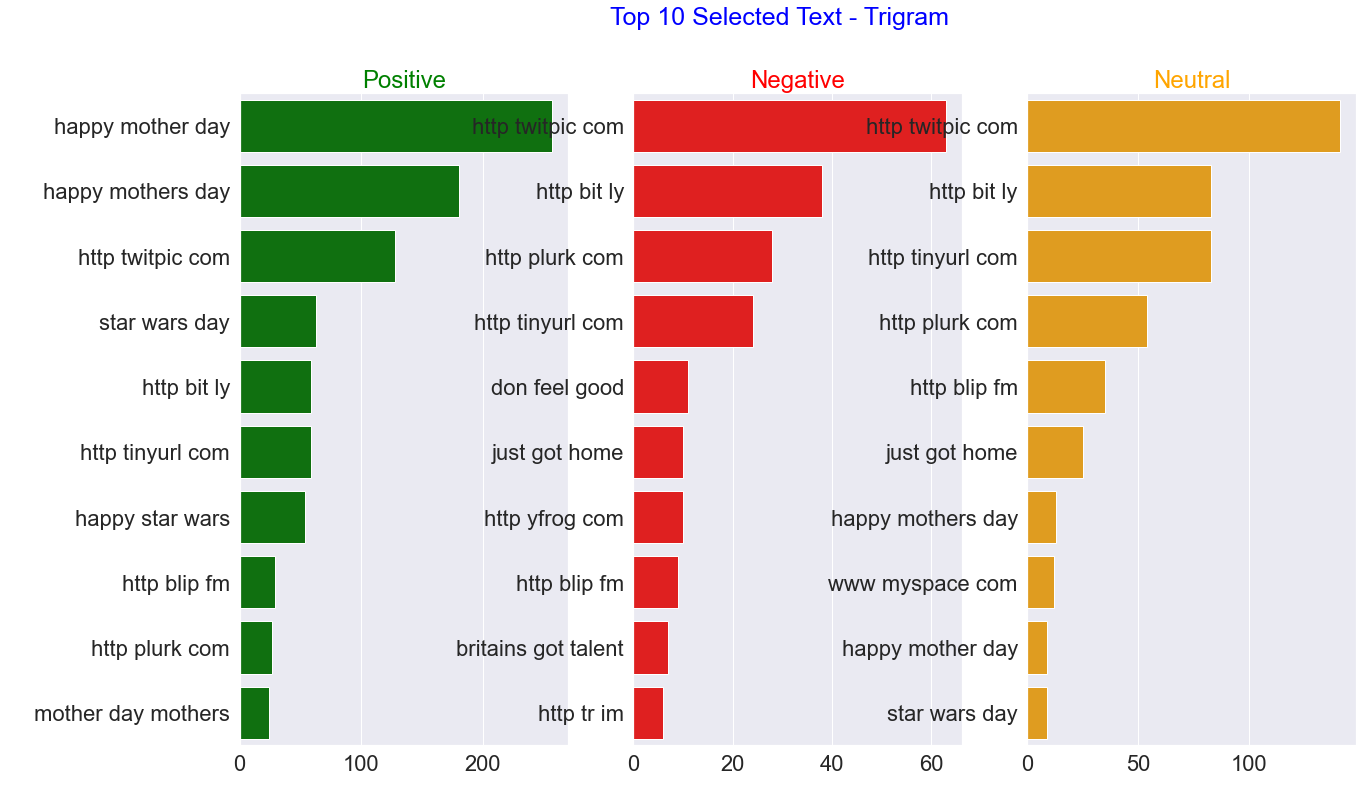

In [16]:
f, axes = plt.subplots(1,3,figsize=(20,12))
sns.set(font_scale =2)
sns.barplot(y=ngrams_plot(train.loc[train['sentiment']=='positive']['text'],(3,3),10)['text'],
            x= ngrams_plot(train.loc[train['sentiment']=='positive']['text'],(3,3),10)['count'],
            color="green",ax=axes[0]).set_title("Positive",color="green")
axes[0].set(ylabel=" ",xlabel=" ")
sns.barplot(y=ngrams_plot(train.loc[train['sentiment']=='negative']['text'],(3,3),10)['text'],
            x=ngrams_plot(train.loc[train['sentiment']=='negative']['text'],(3,3),10)['count'],
            color="red", ax=axes[1]).set_title("Negative",color="red")
axes[1].set(ylabel=" ",xlabel=" ")
sns.barplot(y=ngrams_plot(train.loc[train['sentiment']=='neutral']['text'],(3,3),10)['text'], 
            x=ngrams_plot(train.loc[train['sentiment']=='neutral']['text'],(3,3),10)['count'],
            color="orange", ax=axes[2]).set_title("Neutral",color="orange")
axes[2].set(ylabel=" ",xlabel=" ")
f.suptitle("Top 10 Selected Text - Trigram" ,fontsize=25,color="blue")

## Word Cloud

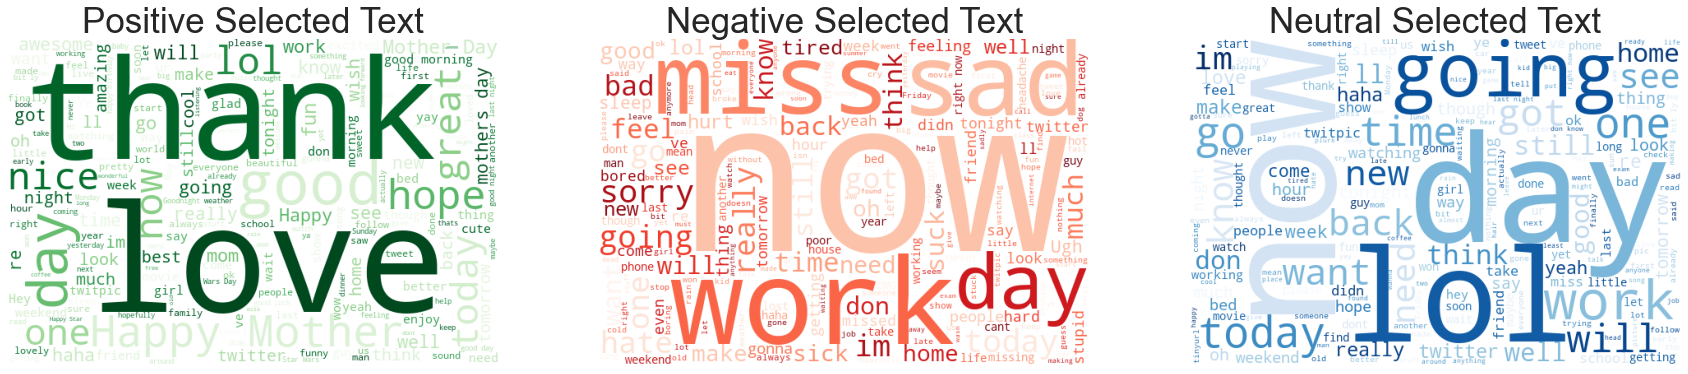

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white', colormap="Greens",
                        width=600,
                        height=400).generate(" ".join(train.loc[train['sentiment']=="positive"]['text']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Selected Text',fontsize=35);

wordcloud2 = WordCloud( background_color='white', colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(train.loc[train['sentiment']=="negative"]['text']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Selected Text',fontsize=35);

wordcloud3 = WordCloud( background_color='white', colormap="Blues",
                        width=600,
                        height=400).generate(" ".join(train.loc[train['sentiment']=="neutral"]['text']))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral Selected Text',fontsize=35);